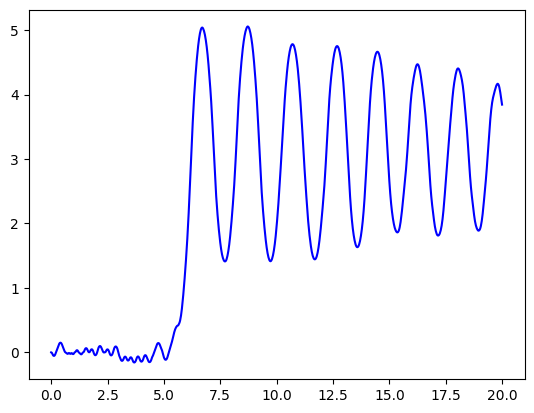

In [3]:
from scipy.io import loadmat
import numpy as np
from numpy import *
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#put the 'U.mat' file inside the File folder
uvec = loadmat('U.mat')
uvec = uvec['U'][0]

#def cart_and_pole(x, t, F):
def cart_and_pole(t, x, F):
  dxdt = np.zeros_like(x)
  g = 9.8 # gravitational acceleration
  mc = 1  # cart mass [kg]
  l = 0.5 # half-pole length [m]
  m = 0.1 # pole mass [kg]
  miup = 0.000002 # pole friction coefficient
  #teta=x(1)  pc=x(3)
  dxdt[0] = x[1] #tetap
  dxdt[1] = ((g*sin(x[0]))+(cos(x[0])*((-F-(m*l*(x[1]**2)*sin(x[0])))/(mc+m)))-((miup*x[1])/(m*l)))/(l*((4/3)-((m*((cos(x[0]))**2))/(mc+m))))    #teta2p
  dxdt[2] = x[3] #xp
  dxdt[3] = (F+(m*l*(((x[1]**2)*sin(x[0]))-((((g*sin(x[0]))+(cos(x[0])*((-F-(m*l*(x[1]**2)*sin(x[0])))/(mc+m)))-((miup*x[1])/(m*l)))/(l*((4/3)-((m*((cos(x[0]))**2))/(mc+m)))))*cos(x[0])))))/(mc+m) #x2p
  return dxdt

time_step=0.02
t0 = 0
x0 = np.array([0.0, 0.0, 0.0, 0.0])
X=[x0]

for i in range(len(uvec)):
  t1 = t0+0.02
  t = np.array([t0, t1])
  F = uvec[i]
  x = solve_ivp(cart_and_pole, t, x0, method='RK45',args=(F, ))
  t0 = t1
  instant = np.where(x.t ==t1)
  x0 = x.y[:,instant][:,0][:,0]
  X=np.append(X, [x0], axis= 0)

time_sim=np.arange(0.0, 20, time_step)
plt.plot(np.arange(0.0, 20+time_step, time_step), X[:,0], 'b', label='theta(t)')

